<a href="https://colab.research.google.com/github/yurigalindo/PyTorchSamples/blob/main/Colab%20Notebooks/Inpainting_with_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hinm00ck
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-hinm00ck
     |████████████████████████████████| 53 kB 1.2 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369221 sha256=25344516365a3d04ca550a597494ec9e65aacac142fa4d75a7046dd9fff1b955
  Stored in directory: /tmp/pip-ephem-wheel-cache-walzy82l/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [ ]:
pip install robustness

     |████████████████████████████████| 95 kB 2.1 MB/s 
     |████████████████████████████████| 124 kB 21.7 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 181 kB 40.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=3fd1ab25b17b648240c721b1eb18e57a0a250e9a3bc2867ccaeaa291ec9e8b15
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/My\ Drive/imagenet100val.zip -d imagenet

In [ ]:
dictionary = {
  "n01968897": "chambered nautilus, pearly nautilus, nautilus",
  "n01770081": "harvestman, daddy longlegs, Phalangium opilio",
  "n01818515": "macaw",
  "n02011460": "bittern",
  "n01496331": "electric ray, crampfish, numbfish, torpedo",
  "n01847000": "drake",
  "n01687978": "agama",
  "n01740131": "night snake, Hypsiglena torquata",
  "n01537544": "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
  "n01491361": "tiger shark, Galeocerdo cuvieri",
  "n02007558": "flamingo",
  "n01735189": "garter snake, grass snake",
  "n01630670": "common newt, Triturus vulgaris",
  "n01440764": "tench, Tinca tinca",
  "n01819313": "sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita",
  "n02002556": "white stork, Ciconia ciconia",
  "n01667778": "terrapin",
  "n01755581": "diamondback, diamondback rattlesnake, Crotalus adamanteus",
  "n01924916": "flatworm, platyhelminth",
  "n01751748": "sea snake",
  "n01984695": "spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish",
  "n01729977": "green snake, grass snake",
  "n01614925": "bald eagle, American eagle, Haliaeetus leucocephalus",
  "n01608432": "kite",
  "n01443537": "goldfish, Carassius auratus",
  "n01770393": "scorpion",
  "n01855672": "goose",
  "n01560419": "bulbul",
  "n01592084": "chickadee",
  "n01914609": "sea anemone, anemone",
  "n01582220": "magpie",
  "n01667114": "mud turtle",
  "n01985128": "crayfish, crawfish, crawdad, crawdaddy",
  "n01820546": "lorikeet",
  "n01773797": "garden spider, Aranea diademata",
  "n02006656": "spoonbill",
  "n01986214": "hermit crab",
  "n01484850": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
  "n01749939": "green mamba",
  "n01828970": "bee eater",
  "n02018795": "bustard",
  "n01695060": "Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis",
  "n01729322": "hognose snake, puff adder, sand viper",
  "n01677366": "common iguana, iguana, Iguana iguana",
  "n01734418": "king snake, kingsnake",
  "n01843383": "toucan",
  "n01806143": "peacock",
  "n01773549": "barn spider, Araneus cavaticus",
  "n01775062": "wolf spider, hunting spider",
  "n01728572": "thunder snake, worm snake, Carphophis amoenus",
  "n01601694": "water ouzel, dipper",
  "n01978287": "Dungeness crab, Cancer magister",
  "n01930112": "nematode, nematode worm, roundworm",
  "n01739381": "vine snake",
  "n01883070": "wombat",
  "n01774384": "black widow, Latrodectus mactans",
  "n02037110": "oystercatcher, oyster catcher",
  "n01795545": "black grouse",
  "n02027492": "red-backed sandpiper, dunlin, Erolia alpina",
  "n01531178": "goldfinch, Carduelis carduelis",
  "n01944390": "snail",
  "n01494475": "hammerhead, hammerhead shark",
  "n01632458": "spotted salamander, Ambystoma maculatum",
  "n01698640": "American alligator, Alligator mississipiensis",
  "n01675722": "banded gecko",
  "n01877812": "wallaby, brush kangaroo",
  "n01622779": "great grey owl, great gray owl, Strix nebulosa",
  "n01910747": "jellyfish",
  "n01860187": "black swan, Cygnus atratus",
  "n01796340": "ptarmigan",
  "n01833805": "hummingbird",
  "n01685808": "whiptail, whiptail lizard",
  "n01756291": "sidewinder, horned rattlesnake, Crotalus cerastes",
  "n01514859": "hen",
  "n01753488": "horned viper, cerastes, sand viper, horned asp, Cerastes cornutus",
  "n02058221": "albatross, mollymawk",
  "n01632777": "axolotl, mud puppy, Ambystoma mexicanum",
  "n01644900": "tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui",
  "n02018207": "American coot, marsh hen, mud hen, water hen, Fulica americana",
  "n01664065": "loggerhead, loggerhead turtle, Caretta caretta",
  "n02028035": "redshank, Tringa totanus",
  "n02012849": "crane",
  "n01776313": "tick",
  "n02077923": "sea lion",
  "n01774750": "tarantula",
  "n01742172": "boa constrictor, Constrictor constrictor",
  "n01943899": "conch",
  "n01798484": "prairie chicken, prairie grouse, prairie fowl",
  "n02051845": "pelican",
  "n01824575": "coucal",
  "n02013706": "limpkin, Aramus pictus",
  "n01955084": "chiton, coat-of-mail shell, sea cradle, polyplacophore",
  "n01773157": "black and gold garden spider, Argiope aurantia",
  "n01665541": "leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea",
  "n01498041": "stingray",
  "n01978455": "rock crab, Cancer irroratus",
  "n01693334": "green lizard, Lacerta viridis",
  "n01950731": "sea slug, nudibranch",
  "n01829413": "hornbill",
  "n01514668": "cock"
}
imagenet100_classes = [dictionary[key].split(",",1)[0] for key in sorted(dictionary.keys())]


In [ ]:
from typing import Callable, List, Type

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import clip
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize, InterpolationMode
  
BICUBIC = InterpolationMode.BICUBIC
device = "cuda" if torch.cuda.is_available() else "cpu"


class CLIP(nn.Module):
    def __init__(self):
        super(CLIP, self).__init__()
        self.clip, self.preprocess = clip.load('ViT-B/32', device)
        self.text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in imagenet100_classes]).to(device)
        self.preprocess = Compose([
        Resize(224, interpolation=BICUBIC),
        CenterCrop(224),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    ])
        print("Encoding texts")
        print(self.text_inputs)
    def forward(self, image: torch.Tensor) -> torch.Tensor:
        return self.clip(self.preprocess(image).to(device),self.text_inputs)[0]

In [ ]:
import os
os.environ['NOTEBOOK_MODE'] = '1'
import sys
import torch as ch
from torch.distributions.multivariate_normal import MultivariateNormal
import numpy as np
import seaborn as sns
from scipy import stats
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
from robustness import model_utils, datasets
#from torch.utils.model_zoo import load_url as load_state_dict_from_url
from robustness.tools.vis_tools import show_image_row, show_image_column
from robustness.tools.label_maps import CLASS_DICT
DATA_PATH_DICT = {
    'CIFAR': '/tmp/',
    'RestrictedImageNet': 'imagenet',
    'ImageNet': 'imagenet',
    'H2Z': '/scratch/datasets/A2B/horse2zebra',
    'A2O': '/scratch/datasets/A2B/apple2orange',
    'S2W': '/scratch/datasets/A2B/summer2winter_yosemite'
}

%matplotlib inline

In [ ]:
# Constants
DATA = 'ImageNet' # Choices: ['RestrictedImageNet']
BATCH_SIZE = 8
NUM_WORKERS = 8
PATCH_SIZE = 60

DATA_SHAPE = 224 # Image size (fixed for dataset)
REPRESENTATION_SIZE = 2048 # Size of representation vector (fixed for model)

In [ ]:
!mkdir imagenet/train
!mkdir imagenet/train/n01440764/
!touch imagenet/train/n01440764/abc.jpg

In [ ]:
# Load dataset
dataset_function = getattr(datasets, DATA)
dataset = dataset_function(DATA_PATH_DICT[DATA])
_, test_loader = dataset.make_loaders(workers=NUM_WORKERS, 
                                      batch_size=BATCH_SIZE, 
                                      data_aug=False,subset=1)
data_iterator = enumerate(test_loader)

==> Preparing dataset imagenet..


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Load model

clip_inst = CLIP()
model_kwargs = {
    'arch': clip_inst,
    'dataset': dataset,
    'add_custom_forward': True
}

model, _ = model_utils.make_and_restore_model(**model_kwargs)
model.eval()
pass

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 101MiB/s]


Encoding texts
tensor([[49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0],
        ...,
        [49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0]], device='cuda:0')


In [ ]:
# Function to get corrupted image
def mask_image(x, width=PATCH_SIZE):
    loc = np.random.randint(0, x.shape[-1] - PATCH_SIZE, size=(x.shape[0], 2))
    mask = ch.zeros_like(x)
    for idx in range(x.shape[0]):
        i, j = loc[idx, 0], loc[idx, 1]
        val = ch.mean(ch.mean(x[idx, :], dim=2, keepdim=True), dim=1, keepdim=True)
        # Initialize masked region as mean pixel value over image (per channel)
        x[idx, :, i:i+PATCH_SIZE, j:j+PATCH_SIZE] = val.expand_as(x[idx, :, i:i+PATCH_SIZE, j:j+PATCH_SIZE])
        mask[idx, :, i:i+PATCH_SIZE, j:j+PATCH_SIZE] = 1
    return x, mask

In [ ]:
# Custom inpainting loss
def inpainting_loss_wrapper(im_targ, mask, normalizer, lambdar=10):
    def inpainting_loss(mod, inp, targ):
        op = mod(normalizer(inp)) #Removed fake_relu = True since it uses GELU
        loss = ch.nn.CrossEntropyLoss(reduction='none')(op, targ)
        loss_l2 = ((im_targ - inp) * (1 - mask) )**2
        loss_l2 = loss_l2.mean(-1).mean(-1).mean(-1)
        loss += lambdar * loss_l2
        return loss, None
    return inpainting_loss

In [ ]:
# PGD parameters
kwargs = {
        'constraint':'2',
        'eps': 21.6,
        'step_size': 0.1,
        'iterations': 720, 
        'do_tqdm': True,
        'targeted': True,
        'should_normalize': False
}

In [ ]:
_, (img_orig, targ_orig) = next(data_iterator)

In [ ]:
np

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>

['tiger shark' 'tick' 'drake' 'rock crab' 'bald eagle' 'common iguana'
 'magpie' 'harvestman']


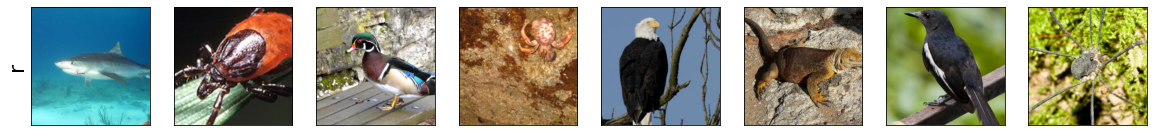

In [ ]:
_, (img_orig, targ_orig) = next(data_iterator)
print(np.array(imagenet100_classes)[targ_orig])
show_image_row([ img_orig.cpu()], 
               ["r"],
               fontsize=22)

In [ ]:
# Inpainting using PGD
_, (img_orig, targ_orig) = next(data_iterator)
img_corrupt, mask = mask_image(img_orig.clone())
model = model.cuda()
kwargs['custom_loss'] = inpainting_loss_wrapper(img_corrupt.cuda(), 
                                                mask.cuda(), 
                                                model.normalizer)

_, img_inpaint = model(img_corrupt.cuda(), targ_orig.clone().cuda(), make_adv=True, **kwargs)

  0%|          | 0/720 [00:00<?, ?it/s]

['toucan' 'drake' 'crane' 'tailed frog' 'sea anemone' 'coucal'
 'spiny lobster' 'peacock']


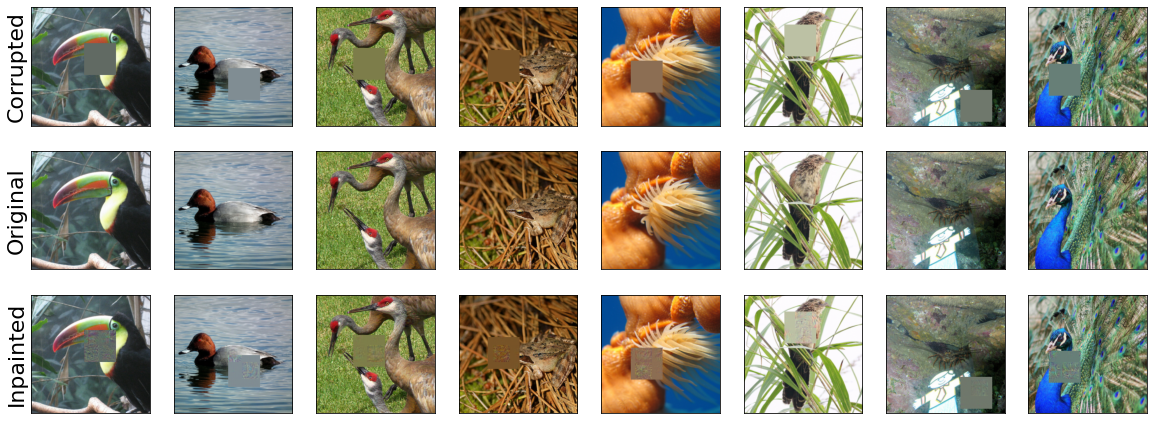

In [ ]:
# Visualize inpainted images
print(np.array(imagenet100_classes)[targ_orig])
show_image_row([img_corrupt.cpu(), img_orig.cpu(), img_inpaint.detach().cpu()], 
               ["Corrupted", "Original", "Inpainted"],
               fontsize=22)

In [ ]:
ch.max(ch.nn.functional.softmax(clip_inst(img_inpaint),dim=-1),dim=-1)

torch.return_types.max(values=tensor([0.9883, 0.4998, 0.9048, 0.9839, 0.6548, 0.6216, 0.9805, 0.9941],
       device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward0>), indices=tensor([66, 67, 90, 21, 73, 62, 83, 58], device='cuda:0'))

In [ ]:
ch.max(ch.nn.functional.softmax(clip_inst(img_corrupt),dim=-1),dim=-1)

torch.return_types.max(values=tensor([0.9775, 0.5664, 0.5537, 0.9741, 0.5503, 0.5381, 0.8076, 0.9556],
       device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward0>), indices=tensor([66, 92, 90, 21, 73, 91, 83, 58], device='cuda:0'))

In [ ]:
print(targ_orig)

tensor([66, 67, 90, 21, 73, 62, 83, 58])


In [ ]:
print(ch.mean(kwargs['custom_loss'](clip_inst.cuda(),img_corrupt.cuda(),targ_orig.cuda())[0]))

tensor(3.8047, device='cuda:0', dtype=torch.float16, grad_fn=<MeanBackward0>)


In [ ]:
print(ch.mean(kwargs['custom_loss'](clip_inst.cuda(),img_inpaint.cuda(),targ_orig.cuda())[0]))

tensor(0.0002, device='cuda:0', dtype=torch.float16, grad_fn=<MeanBackward0>)
